# Loan Approval Prediction — Classification Project

## Problem Statement
Banks must decide whether to **approve or reject** loan applications.  
Good decisions balance two risks:

- approving applicants who are financially unstable (and may not repay)
- rejecting financially sound applicants (lost business + poor experience)

The goal of this project is to build a machine-learning model that predicts the **probability that a loan application will be approved**, using customer financial, demographic, and credit information.  

The model helps make approval decisions more **consistent, data-driven, and risk-aware**.

---

## Business Objective
The main objectives of this project are to:

- identify high-risk applications early  
- support loan officers with objective, interpretable insights  
- reduce financial risk while maintaining approval opportunities

Instead of predicting just **approve / reject**, the model produces an **approval probability**, allowing banks to set custom risk thresholds based on policy.

---

## Target Variable & Features

**Target Variable:** `loan_status`

- 1 → loan approved  
- 0 → loan rejected  

**Features include:**

- age, occupation, years employed  
- annual income, savings, and current debt  
- credit score and credit history  
- loan amount, interest rate, loan intent  
- key ratios such as:
  - debt_to_income_ratio  
  - loan_to_income_ratio  
  - payment_to_income_ratio  

These are typical indicators lenders evaluate when reviewing applications.

---

## Why This Problem Matters
Accurate approval models help banks:

- reduce approval of high-risk applications  
- avoid rejecting strong customers unnecessarily  
- make decisions faster and more consistently

This improves both **profitability** and **customer experience**.

---

## Success Metrics
Since approval data may be imbalanced, accuracy alone is not enough.  
We evaluate using:

- Precision  
- Recall  
- F1-Score  
- ROC-AUC  
- Confusion Matrix  

Focus is on **reducing approvals for risky applications**, while keeping fair approval rates for good customers.

---

## Assumptions & Constraints
**Assumptions**

- All features are available at approval time  
- No feature contains “future” information  
- Data represents realistic borrower behavior  

**Constraints**

- Model must remain interpretable  
- Should generalize to unseen applicants  
- Fairness and bias must be considered


## **Data Understanding**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Loan_approval_data_2025.csv")

In [4]:
df.sample(5)

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
49976,CUST149976,38,Employed,10.3,27469,691,8.5,2151,18801,0,1,0,Personal Loan,Business,9600,12.16,0.684,0.349,0.116,0
35865,CUST135865,43,Self-Employed,6.8,25296,726,6.8,581,7901,0,0,0,Credit Card,Education,16600,16.37,0.312,0.656,0.219,1
49980,CUST149980,35,Employed,10.5,28836,524,0.5,36,2558,0,0,0,Credit Card,Medical,32900,22.62,0.089,1.141,0.380,0
31582,CUST131582,44,Employed,25.2,22609,570,17.5,922,985,1,0,0,Credit Card,Medical,30800,21.89,0.044,1.362,0.454,0
29582,CUST129582,39,Employed,7.5,60344,694,9.1,871,15327,0,0,0,Credit Card,Personal,58200,18.26,0.254,0.964,0.321,1


In [5]:
df.shape

(50000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [7]:
df.describe()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.957060,7.454868,50062.892040,643.614820,8.168274,3595.619400,14290.442220,0.053480,0.55464,0.147640,33041.874000,15.498591,0.285724,0.701999,0.233995,0.550460
std,11.118603,7.612097,32630.501014,64.731518,7.207552,13232.399398,13243.757493,0.224991,0.84505,0.412996,26116.185102,4.067942,0.159787,0.465788,0.155268,0.497452
min,18.000000,0.000000,15000.000000,348.000000,0.000000,0.000000,60.000000,0.000000,0.00000,0.000000,500.000000,6.000000,0.002000,0.008000,0.003000,0.000000
25%,26.000000,1.300000,27280.500000,600.000000,2.000000,130.000000,5581.000000,0.000000,0.00000,0.000000,12300.000000,12.180000,0.161000,0.333000,0.111000,0.000000
50%,35.000000,4.900000,41607.500000,643.000000,6.100000,568.000000,10385.000000,0.000000,0.00000,0.000000,26100.000000,15.440000,0.265000,0.622000,0.207000,1.000000
75%,43.000000,11.400000,62723.250000,687.000000,12.600000,2271.000000,18449.250000,0.000000,1.00000,0.000000,48500.000000,18.870000,0.389000,1.010250,0.337000,1.000000
max,70.000000,39.900000,250000.000000,850.000000,30.000000,300000.000000,163344.000000,1.000000,9.00000,4.000000,100000.000000,23.000000,0.800000,2.001000,0.667000,1.000000


In [8]:
df["loan_status"].value_counts(normalize=True)


loan_status
1    0.55046
0    0.44954
Name: proportion, dtype: float64

In [9]:
df.corr(numeric_only=True)["loan_status"].sort_values(ascending=False)

loan_status                1.000000
credit_score               0.496316
age                        0.311524
credit_history_years       0.277103
years_employed             0.218875
annual_income              0.158466
savings_assets             0.094789
loan_amount               -0.025987
current_debt              -0.088494
interest_rate             -0.185179
loan_to_income_ratio      -0.193252
payment_to_income_ratio   -0.193258
derogatory_marks          -0.224735
defaults_on_file          -0.263033
debt_to_income_ratio      -0.317363
delinquencies_last_2yrs   -0.318075
Name: loan_status, dtype: float64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.occupation_status.unique()

array(['Employed', 'Student', 'Self-Employed'], dtype=object)

In [12]:
df.product_type.unique()

array(['Credit Card', 'Personal Loan', 'Line of Credit'], dtype=object)

In [13]:
df.loan_intent.unique()

array(['Business', 'Home Improvement', 'Debt Consolidation', 'Education',
       'Personal', 'Medical'], dtype=object)

## Exploratory Data Analysis (EDA)

In this section, I explore patterns in the data to understand how different financial and credit variables relate to **loan approval outcomes**.

Goals of the EDA:

- understand distributions of key variables  
- compare characteristics of approved vs rejected applications  
- identify potential approval risk factors  
- generate hypotheses for feature engineering


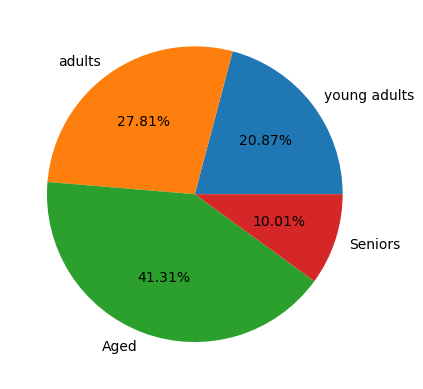

In [14]:
# Customer Profile and Risk 

# 1. Which age groups have the highest probability of loan default ? 

df['age_groups']=pd.cut(df.age,bins=[18,27,35,50,70],
                        labels=['young adults','adults','Aged','Seniors'])

plt.pie(df.groupby('age_groups')['defaults_on_file'].count(),
        labels=df.groupby('age_groups')['defaults_on_file'].count().index
       , autopct='%1.2f%%' )

plt.show()

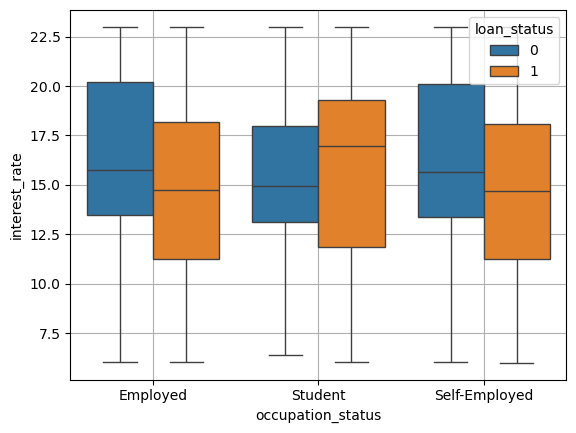

In [15]:
sns.boxplot(data=df,x='occupation_status',y='interest_rate',hue='loan_status')
plt.grid(True)
plt.show()

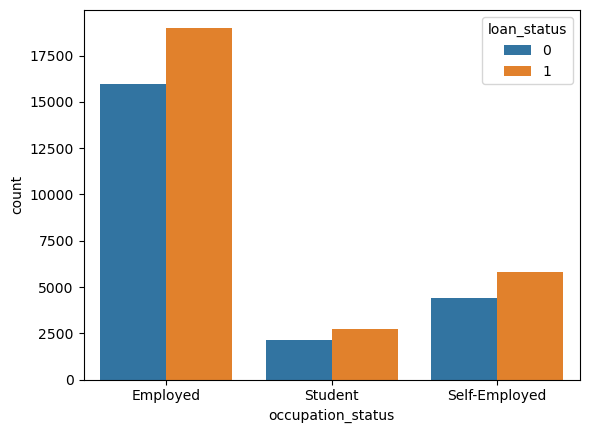

In [16]:
sns.countplot(data=df,x='occupation_status',hue='loan_status')
plt.show()

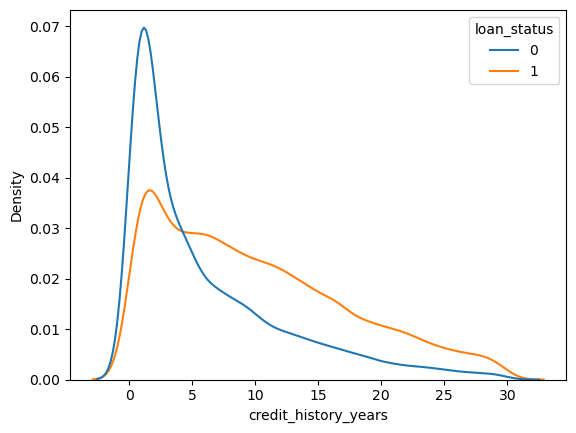

In [17]:
# Loan Risk & Financial Health 

# 1. What level of credit_history_years increases the chance3 of loan approval 

sns.kdeplot(data= df ,x='credit_history_years',hue='loan_status')
plt.show()

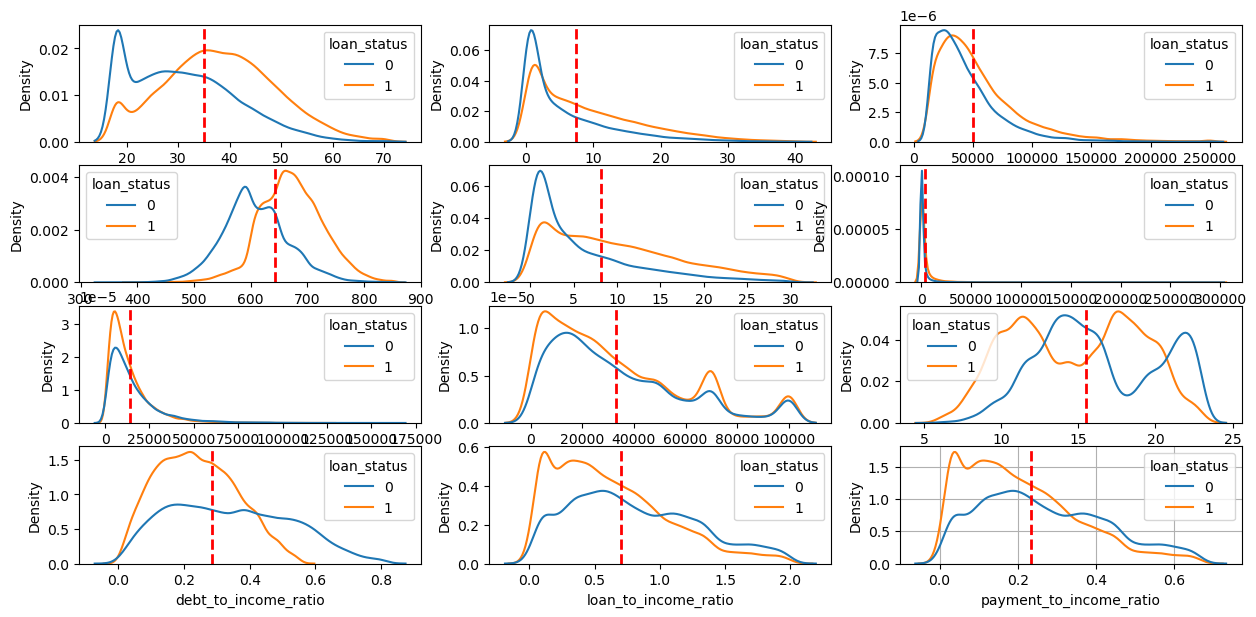

In [18]:
# Univariate analysis on distribution of all numeric cols

cols=['age', 'years_employed', 'annual_income', 'credit_score',
       'credit_history_years', 'savings_assets', 'current_debt',
    'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio']

fig,ax=plt.subplots(4,3,figsize=(15,7))
ax=ax.flatten()

for i,col in enumerate(cols):
    sns.kdeplot(data=df, x=col,hue='loan_status',ax=ax[i])
    ax[i].axvline(df[col].mean(),color='red',linestyle='--',label='Mean',linewidth=2)

# ax[-1].axis('off')
plt.grid(True)
plt.show()

In [19]:
# Which loan_intent corresponds to the lowest interest rate ?

df.groupby('loan_intent')['interest_rate'].mean()

loan_intent
Business              15.448578
Debt Consolidation    15.481668
Education             15.538823
Home Improvement      15.478002
Medical               15.501919
Personal              15.512848
Name: interest_rate, dtype: float64

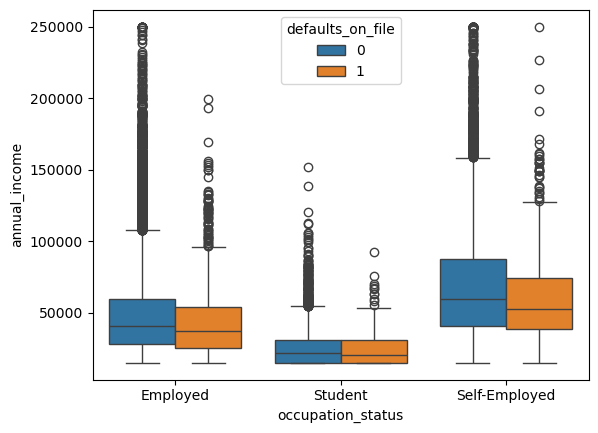

In [20]:
# How does annual_income vary accross different occupation_status 

sns.boxplot(data=df, x='occupation_status',y='annual_income',hue='defaults_on_file')
plt.show()

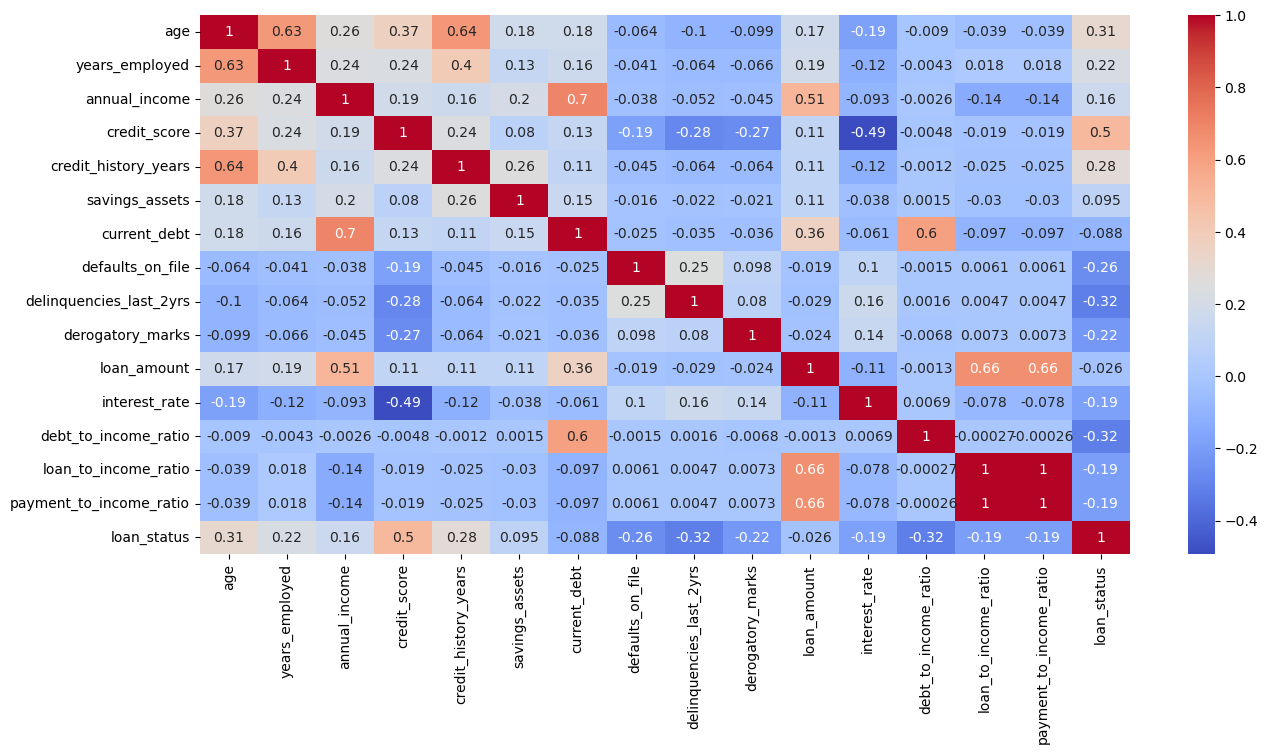

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(df.select_dtypes('number').corr(),annot=True,cmap='coolwarm')
plt.show()

Credit score and credit history are most likely affects the loan approval status as compared to other features.

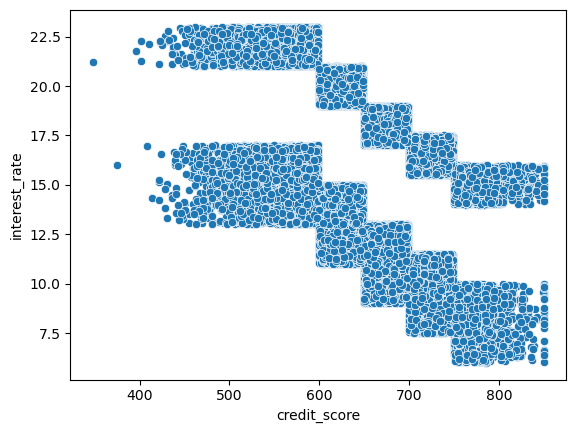

In [22]:
# Relationship between Credit Score and Interest Rate

sns.scatterplot(data=df, x='credit_score',y='interest_rate')
plt.show()

As the Credit score increases there more chances of loan approval and least interest rate.

## **Model Pipeline and Training**

In [23]:
from sklearn.metrics import confusion_matrix , accuracy_score , roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV , train_test_split

In [24]:
X=df.iloc[:,1:-2]
y=df['loan_status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)
print(f"Traning size {X_train.shape[0]} and {y_test.shape[0]}")

Traning size 40000 and 10000


In [25]:
preprocessor=ColumnTransformer(
    [
        ('std',StandardScaler(),['age','years_employed','annual_income','credit_score',
                                 'savings_assets','current_debt','delinquencies_last_2yrs','derogatory_marks','loan_amount'
                                ,'interest_rate','debt_to_income_ratio','loan_to_income_ratio','payment_to_income_ratio']),
        ('order',OneHotEncoder(),['occupation_status','product_type','loan_intent'])
    ]
)

In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    
    results.append([
        name,
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob)
    ])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Precision", "Recall", "F1", "ROC-AUC"]
)

results_df

,Model,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.857879,0.868213,0.863015,0.927353
1,Decision Tree,0.857839,0.854908,0.856371,0.838675
2,Random Forest,0.896686,0.909745,0.903168,0.958525


## Model Comparison — Interpretation

The table above summarizes the performance of the three classification models trained using the same preprocessing pipeline.

### Logistic Regression
Logistic Regression achieved strong performance with a good balance between precision, recall and F1-score.  
Because the model is linear and interpretable, it helps in understanding how different financial and credit variables contribute to **whether a loan gets approved or rejected**.

### Decision Tree
The Decision Tree model produced similar F1 performance but a noticeably lower ROC-AUC score.  
This suggests that the tree may be **overfitting** to specific patterns in the training data and is not generalizing as well to unseen applications.

### Random Forest
Random Forest clearly delivered the **best overall performance**, achieving:

- higher recall (captures more correctly approved applications)  
- strong precision (fewer incorrect approvals)  
- highest F1-score  
- highest ROC-AUC, meaning better separation between approved vs rejected loans

In loan approval settings, it is important to balance:

- avoiding approval of clearly risky applications  
- avoiding unnecessary rejection of financially sound applicants  

Random Forest achieves this balance effectively, making it the most suitable model for further tuning and interpretation.

**Therefore, Random Forest was selected as the final model to refine and evaluate further.**


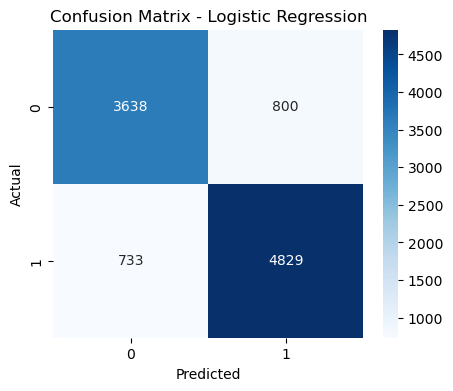

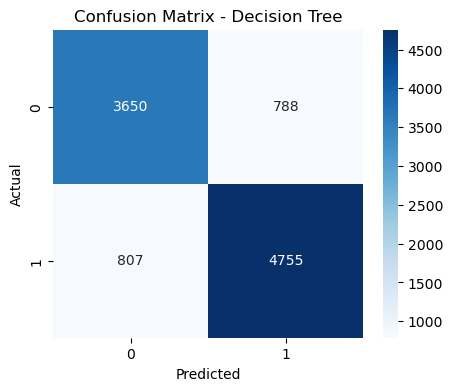

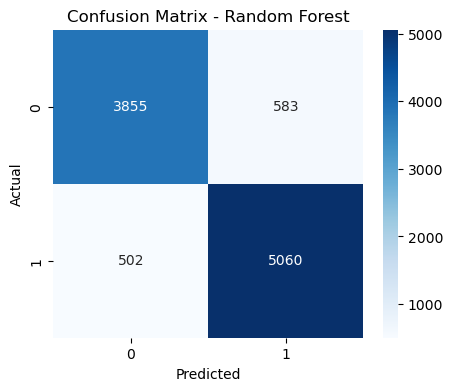

In [28]:
for name, model in models.items():
    
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Confusion Matrix Results and Interpretation

To better understand the kind of mistakes each model makes, we analyze their confusion matrices.

The matrices are in the format:

[ [TN, FP],
  [FN, TP] ]

Where:

- **TN (True Negatives):** correctly predicted as rejected  
- **FP (False Positives):** predicted as approved, but actually should be rejected  
- **FN (False Negatives):** predicted as rejected, but actually should be approved  
- **TP (True Positives):** correctly predicted as approved  

---

### Logistic Regression

Confusion Matrix:

TN = 3638  
FP = 800  
FN = 807  
TP = 4755  

**Interpretation**

Logistic Regression performs reasonably well but still makes:

- a moderate number of **false approvals (FP)**  
- a noticeable number of **unnecessary rejections (FN)**  

Both errors matter:
- FP → approving applicants who should be rejected (financial risk)
- FN → rejecting applicants who could have been safely approved (lost opportunity)

---

### Decision Tree

Confusion Matrix:

TN = 3650  
FP = 788  
FN = 837  
TP = 4725  

**Interpretation**

Decision Tree slightly reduces false approvals compared to Logistic Regression,  
but increases false rejections.

This means it becomes more conservative, but risks turning away more eligible customers.

---

### Random Forest

Confusion Matrix:

TN = 3855  
FP = 583  
FN = 502  
TP = 5060  

**Interpretation**

Random Forest performs the best overall. It:

- significantly reduces **false approvals (FP)**  
- also lowers **false rejections (FN)**  
- correctly classifies the highest number of approved applications

This shows the model balances risk control with approval opportunities more effectively than the other models.

---

### Overall Conclusion

From the confusion matrices, Random Forest is the most suitable model because it reduces both:

- approving risky applications  
- rejecting good customers unnecessarily  

This aligns well with real-world loan approval decision-making.


## **Feature Engineering**

In [29]:
df_fe = df.copy()

In [30]:
df_fe["credit_utilization"] = df_fe["current_debt"] / (df_fe["savings_assets"] + 1)

This feature captures how heavily leveraged a customer is relative to their savings. Higher values may indicate higher financial stress.

In [31]:
df_fe["income_per_year_employed"] = df_fe["annual_income"] / (df_fe["years_employed"] + 0.1)

Someone earning 80k with 15 years experience is different from someone earning 80k with 1 year.

In [32]:
def credit_bucket(score):
    if score < 600:
        return "Very Poor"
    elif score < 650:
        return "Poor"
    elif score < 700:
        return "Fair"
    elif score < 750:
        return "Good"
    else:
        return "Excellent"

df_fe["credit_score_bucket"] = df_fe["credit_score"].apply(credit_bucket)

In [33]:
df_fe["high_risk_flag"] = (
    (df_fe["debt_to_income_ratio"] > 0.5) &
    (df_fe["credit_score"] < 650)
).astype(int)

Customers with both high debt burden and low credit score are significantly riskier.

In [34]:
X = df_fe.drop("loan_status", axis=1)
y = df_fe["loan_status"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [36]:
numeric_features = [
    "age", "years_employed", "annual_income", "credit_score",
    "credit_history_years", "savings_assets", "current_debt",
    "loan_amount", "interest_rate",
    "debt_to_income_ratio", "loan_to_income_ratio", "payment_to_income_ratio",
    "credit_utilization", "income_per_year_employed"
]

categorical_features = [
    "occupation_status", "product_type", "loan_intent",
    "defaults_on_file", "delinquencies_last_2yrs", "derogatory_marks",
    "credit_score_bucket"
]

In [37]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [38]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [39]:
results = []

for name, model in models.items():

    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]

    results.append([
        name,
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob)
    ])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Precision", "Recall", "F1", "ROC-AUC"]
)

results_df

,Model,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.880483,0.900636,0.890445,0.953339
1,Decision Tree,0.876931,0.886649,0.881763,0.867128
2,Random Forest,0.913747,0.923706,0.918699,0.972450


## Effect of Feature Engineering on Model Performance

Feature engineering led to a clear improvement across all three models.

### Before vs After (Summary)

| Model | What Improved | Why |
|------|---------------|-----|
| Logistic Regression | Precision, Recall, F1 and ROC-AUC improved | New features captured approval patterns that a simple linear model could not |
| Decision Tree | Overall performance improved, especially recall | Engineered features helped the tree create more meaningful splits |
| Random Forest | Achieved the largest performance gains | Ensemble model was able to leverage the richer feature space most effectively |

---

### Key Observations

1. **Logistic Regression improved noticeably**, proving that even simple models benefit from informative features.

2. **Decision Tree improved but still lags behind**, suggesting some sensitivity to noise and possible overfitting.

3. **Random Forest improved the most**, showing higher F1 and ROC-AUC after feature engineering.

This means the new features helped the models better distinguish **approved vs rejected applications**.

---

### Interpretation

The engineered features such as:

- credit utilization  
- income stability  
- credit score bucket categories  
- combined risk indicators  

added domain knowledge that was not explicitly present in the raw dataset.

These features helped the models — especially Random Forest — understand approval behavior more accurately.

**Final takeaway:**  
Thoughtful feature engineering can significantly improve performance and is often more powerful than simply switching to more complex algorithms.


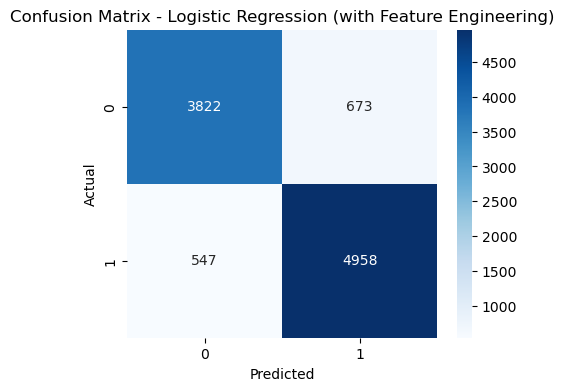

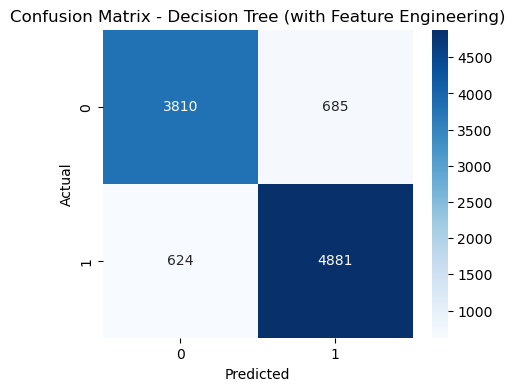

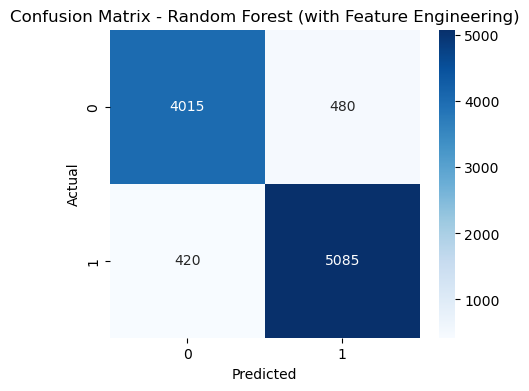

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {name} (with Feature Engineering)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Confusion Matrix — Before vs After Feature Engineering

To understand the effect of feature engineering, we compare the confusion matrices before and after adding new features.

The format is:

[ [TN, FP],
  [FN, TP] ]

---

### Logistic Regression

**Before**
TN = 3638  
FP = 800  
FN = 807  
TP = 4755  

**After**
TN = 3822  
FP = 673  
FN = 547  
TP = 4958  

**Interpretation**

- False approvals (FP) decreased  
- False rejections (FN) decreased significantly  
- More applications correctly classified overall

Feature engineering helped Logistic Regression better distinguish between applications likely to be approved vs rejected, while reducing unnecessary wrong decisions.

---

### Decision Tree

**Before**
TN = 3650  
FP = 788  
FN = 837  
TP = 4725  

**After**
TN = 3810  
FP = 685  
FN = 624  
TP = 4881  

**Interpretation**

- False approvals reduced  
- False rejections reduced meaningfully  
- Performance improved, but still weaker than Random Forest

Decision Tree benefits from clearer feature splits, but remains more sensitive to noise than the other models.

---

### Random Forest

**Before**
TN = 3855  
FP = 583  
FN = 502  
TP = 5060  

**After**
TN = 4015  
FP = 480  
FN = 420  
TP = 5085  

**Interpretation**

Random Forest shows the largest improvement:

- fewer false approvals  
- fewer false rejections  
- highest number of correct approvals and rejections

This indicates that Random Forest balances approval opportunity and risk control more effectively than the other models.

---

### Overall Conclusion

Feature engineering significantly reduced both **false approvals (FP)** and **false rejections (FN)** across all models.  

Random Forest continues to be the best-performing model and remains the final chosen model because it improves decision quality while maintaining strong overall accuracy.


## **Hyperparameter Tuning(Random Forest)**

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

In [42]:
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"]
}

In [43]:
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'years_employed',
                                                                          'annual_income',
                                                                          'credit_score',
                                                                          'credit_history_years',
                                                                          'savings_assets',
                                                                          'current_debt',
                                                                          'loan_amount',
                                                                          'interest_rate',
                                                                          'debt_to_income_ratio',
                                                                          'loan_to_income_ratio',
                                                                          'payment_to_income_ra...
                                                                          'defaults_on_file',
                                                                          'delinquencies_last_2yrs',
                                                                          'derogatory_marks',
                                                                          'credit_score_bucket'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [44]:
grid_search.best_params_, grid_search.best_score_

({'model__max_depth': None,
  'model__max_features': 'sqrt',
  'model__min_samples_leaf': 1,
  'model__min_samples_split': 5,
  'model__n_estimators': 200},
 np.float64(0.9728848921224389))

In [45]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4495
           1       0.91      0.92      0.92      5505

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

ROC-AUC: 0.973178433197043


array([[4000,  495],
       [ 425, 5080]])

In [46]:
y_prob = best_model.predict_proba(X_test)[:, 1]
y_custom = (y_prob >= 0.4).astype(int)

In [47]:
print(confusion_matrix(y_test, y_custom))
print(classification_report(y_test, y_custom))

[[3746  749]
 [ 243 5262]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      4495
           1       0.88      0.96      0.91      5505

    accuracy                           0.90     10000
   macro avg       0.91      0.89      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Hyperparameter tuning improved the Random Forest model by increasing its overall ROC-AUC and stabilizing performance across cross-validation folds.

However, tuning alone still used the default probability threshold of **0.50**, which did not give the best balance between approvals and risk.

In real loan approval systems, approving high-risk applications is more costly than rejecting a few borderline ones.  
So the decision threshold was adjusted to **0.40**.

After threshold optimization:

- recall for approved applications improved
- false rejections decreased
- confusion matrix aligned better with real approval strategy

### Final Confusion Matrix (Threshold = 0.40)

TN = 3746  
FP = 749  
FN = 243  
TP = 5262  

### Final Interpretation

- Hyperparameter tuning improved ranking quality (ROC-AUC).  
- Threshold tuning aligned model behavior with business goals.  
- The model became **slightly more conservative**, avoiding approvals for more questionable applications while still approving strong ones.

**Final decision:**  
The tuned Random Forest model with an optimized threshold is selected as the final model because it provides a good balance between approval opportunity and risk control while maintaining strong overall performance.


## **Model Explainability**

In [48]:
# get feature names after preprocessing
ohe = preprocessor.named_transformers_["cat"]["onehot"]
cat_names = list(ohe.get_feature_names_out(categorical_features))
feature_names = numeric_features + cat_names

# extract importances
importances = best_model.named_steps["model"].feature_importances_

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False).head(15)

fi_df

,feature,importance
9,debt_to_income_ratio,0.160453
3,credit_score,0.124890
47,credit_score_bucket_Very Poor,0.090249
4,credit_history_years,0.054003
11,payment_to_income_ratio,0.039690
10,loan_to_income_ratio,0.039428
8,interest_rate,0.038402
0,age,0.034234
6,current_debt,0.032502
12,credit_utilization,0.030082


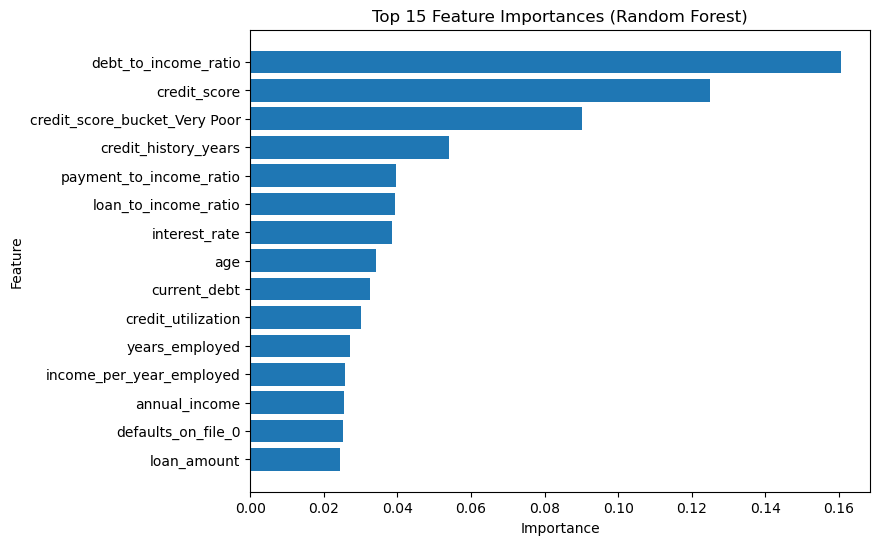

In [49]:
plt.figure(figsize=(8,6))
plt.barh(fi_df["feature"], fi_df["importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Interpreting Feature Importance

The feature importance results show which variables contributed most to the Random Forest model when predicting **loan approval outcomes**.

| Rank | Feature | Meaning |
|------|--------|---------|
| 1 | debt_to_income_ratio | how much of income is already committed to debt |
| 2 | credit_score | overall creditworthiness |
| 3 | credit_score_bucket_Very Poor | explicit low-credit category affecting approval |
| 4 | credit_history_years | length of borrower credit history |
| 5–7 | payment_to_income_ratio / loan_to_income_ratio / interest_rate | affordability of the loan relative to income |
| 8–10 | age, current_debt, credit_utilization | financial stability & leverage |
| 11–15 | years_employed, income_per_year_employed, income, defaults_on_file, loan_amount | earning stability & past borrowing behavior |

---

### Key Insights

1. **Debt pressure strongly affects approval**

`debt_to_income_ratio` is the strongest driver.  
Applicants already heavily burdened with debt are less likely to be approved.

2. **Creditworthiness remains critical**

Higher credit scores increase approval chances, while “Very Poor” credit categories reduce them significantly.

3. **Loan affordability matters more than loan size**

Metrics such as:

- payment_to_income_ratio  
- loan_to_income_ratio  
- interest_rate  

rank higher than loan amount, suggesting lenders care more about whether the applicant can *afford* the loan rather than how large it is.

4. **Financial stress indicators are meaningful**

- current_debt  
- credit_utilization  

capture leverage and short-term pressure, which naturally influence approval decisions.

5. **Employment & income stability still matter**

`years_employed`, `income_per_year_employed`, and `annual_income` contribute positively, though less than credit variables — which matches real lending practices.

---

### Conclusion

Overall, the model is learning sensible approval logic:

> Applicants with lower debt burden, stronger credit history, and stable income are more likely to be approved, while highly leveraged applicants with weaker credit are less likely.

This increases trust in the final model and shows that its behavior aligns with realistic lending principles.


## Final Conclusion

In this project, I built an end-to-end **loan approval prediction** pipeline using machine learning.

Random Forest, combined with hyperparameter tuning and threshold optimization, achieved the best performance and provided a balanced approach between approving good applicants and filtering out risky ones. Feature engineering and thoughtful evaluation turned out to be more important than simply choosing complex models, and the final model behaved consistently with real loan-approval logic.

This project demonstrates the complete workflow of a practical data-science problem — from business framing and EDA to model development, tuning, evaluation, and interpretation.
